*** TEMEL KÜTÜPHANELER ***

In [71]:
# Temel çizimler için kullanılır
import matplotlib.pyplot as plt

# Grafik noktasında yüksek seviyeli bir arayüz sağlar
import seaborn as sns

# Veri analizi ve manipülasyonu için kullanılır
import pandas as pd

# Bilimsel hesaplamalar ve matematiksel işlemler için kullanılır
import numpy as np

# Metin karşılaştırma ve eşleştirme işlemleri için kullanılır
from fuzzywuzzy import fuzz, process

# Kategorik verileri sayısala çevirmek için kullanılır
from sklearn.preprocessing import LabelEncoder

# Veri normalleştirme işlemi için kullanılır
from mlxtend.preprocessing import minmax_scaling

# Hicri ve miladi takvim dönüşümü için kullanılır
from hijri_converter import convert

# Metin formatındaki tarih ve saatleri ayrıştırmak için kullanılır
from dateutil import parser

#Uyarı sistemini kontrol etmek için kullanılır
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

*** VERİ SETİNİN İNCELENMESİ ***

In [72]:
# Dosya uygun formatta okunur 
data = pd.read_csv("Dataset/PakistanSuicideAttacks.csv", encoding="ISO-8859-1")

In [73]:
data

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.718000,73.0718,Capital,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.991800,66.9911,Sindh,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.991800,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.991800,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.209500,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,492,Thursday-October-05-2017,13 MuHarram 1439 A.H,Working Day,NaN,NaN,Quetta,28.571051,67.496895,Balochistan,...,NaN,21.0,22.0,25.0,NaN,1.0,NaN,"Larkana Hospital, Gandawah District Headquarte...",27.800,81.000
492,493,Thursday-October-19-2017,27 MuHarram 1439 A.H,Working Day,NaN,8:00 AM,Quetta,NaN,NaN,Balochistan,...,NaN,7.0,7.0,22.0,22,1.0,NaN,NaN,26.000,79.000
493,494,Thursday-November-9-2017,19 Safar 1439 A.H,Working Day,NaN,7:00 AM,Quetta,30.221057,67.002524,Balochistan,...,NaN,2.0,2.0,8.0,8,1.0,15KG,"Combined Military Hospital (CMH)-(Quetta), Civ...",25.000,77.000
494,495,Friday-November-24-2017,5 Rabi Al-Awwal 1439 A.H,Working Day,NaN,7:00 AM,Peshawar,33.970623,71.43862,KPK,...,NaN,1.0,3.0,6.0,8,1.0,20KG,Hayatabad Medical Complex(Peshawar),22.000,72.000


In [74]:
# veri setinden ilk beş veriyi listeler
data.head()

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,NaN,7:45 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00 AM,Karachi,24.9918,66.9911,Sindh,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,Baluchistan,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta \n2.Civil Hospital 3. Boland Medi...,33.120,91.616


In [75]:
# veri setindeki sutunları ve veri tiplerini gösterir
data.dtypes

S#                           int64
Date                        object
Islamic Date                object
Blast Day Type              object
Holiday Type                object
Time                        object
City                        object
Latitude                   float64
Longitude                   object
Province                    object
Location                    object
Location Category           object
Location Sensitivity        object
Open/Closed Space           object
Influencing Event/Event     object
Target Type                 object
Targeted Sect if any        object
Killed Min                 float64
Killed Max                 float64
Injured Min                float64
Injured Max                 object
No. of Suicide Blasts      float64
Explosive Weight (max)      object
Hospital Names              object
Temperature(C)             float64
Temperature(F)             float64
dtype: object

In [76]:
# veri setinin sutun adlarını gösterir
data.columns

Index(['S#', 'Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time',
       'City', 'Latitude', 'Longitude', 'Province', 'Location',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Influencing Event/Event', 'Target Type', 'Targeted Sect if any',
       'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names',
       'Temperature(C)', 'Temperature(F)'],
      dtype='object')

In [77]:
# veri setindeki null değerleri gösterir
data.isnull().sum()

S#                           0
Date                         0
Islamic Date               154
Blast Day Type              10
Holiday Type               424
Time                       211
City                         0
Latitude                     3
Longitude                    3
Province                     0
Location                     3
Location Category           35
Location Sensitivity        36
Open/Closed Space           35
Influencing Event/Event    305
Target Type                 26
Targeted Sect if any       399
Killed Min                 146
Killed Max                  16
Injured Min                131
Injured Max                 32
No. of Suicide Blasts       82
Explosive Weight (max)     324
Hospital Names             199
Temperature(C)               5
Temperature(F)               7
dtype: int64

<Axes: >

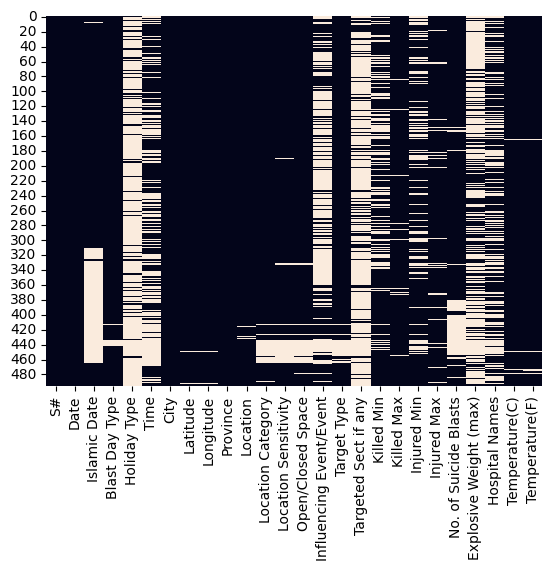

In [78]:
# veri setinde null değere sahip olanları görsel bir şekilde gösterir
sns.heatmap(data.isnull(), cbar=False)

In [79]:
# Sütunlar hakkında genel bilgi sağlar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S#                       496 non-null    int64  
 1   Date                     496 non-null    object 
 2   Islamic Date             342 non-null    object 
 3   Blast Day Type           486 non-null    object 
 4   Holiday Type             72 non-null     object 
 5   Time                     285 non-null    object 
 6   City                     496 non-null    object 
 7   Latitude                 493 non-null    float64
 8   Longitude                493 non-null    object 
 9   Province                 496 non-null    object 
 10  Location                 493 non-null    object 
 11  Location Category        461 non-null    object 
 12  Location Sensitivity     460 non-null    object 
 13  Open/Closed Space        461 non-null    object 
 14  Influencing Event/Event  1

In [80]:
# veri seri için aşağıda listelenen özellikleri görmek için
data.describe()
# count: Toplam veri sayısı (eksik veriler hariç)
# mean: Ortalama değer
# std: Standart sapma
# min: En küçük değer
# 25%: Birinci çeyrek (Q1)
# 50%: Medyan (ikinci çeyrek, Q2)
# 75%: Üçüncü çeyrek (Q3)
# max: En büyük değer

,S#,Latitude,Killed Min,Killed Max,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,493.000000,350.000000,480.000000,365.000000,414.000000,491.000000,489.000000
mean,248.500000,32.614705,14.725714,15.206250,31.397260,1.115942,21.111599,69.972579
std,143.327132,2.475917,17.600930,20.270436,38.603842,0.394989,8.369068,15.069622
min,1.000000,24.879503,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,31.823800,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,33.583300,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,34.004300,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,35.383300,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


*** VERİ ÖN İŞLEMESİ ***

In [81]:
print(data.shape) # eski dataFrame

df = data # yeni dataFrame (Üzerinde işlemler yapacağımız)
print(df.shape)

(496, 26)
(496, 26)


1. 'S#' Sütununu Siliyourz

In [82]:
# index sütununa gerek duyulmadığı için S sütununu sildik (Öte yandan index gösterimi zaten mevcut)
df = df.drop('S#', axis = 1, inplace = False)
# index sutunu zaten var olduğu için  s# sütunun kaldırdık
# axis = 1 : sutun değeri için
# axis = 0 : satır değeri için
# inplace = True : Orjinal veri üzerinde bu işlemi yapar
# inplace = False : Değişiklikleri yeni bir değişkene atar

df.head(2)

,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,Capital,Egyptian Embassy,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,Sindh,office of Nawa-e-Waqt,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786


2. 'Blast Day Type' Sütunu üzerinde çalışıyoruz

In [83]:
# Patlama günü türü sütunundaki boş değerler
print("\nNumber of Null Values in 'Blast Day Type' Column: ", df['Blast Day Type'].isnull().sum())

print("\n", df['Blast Day Type'].value_counts())


Number of Null Values in 'Blast Day Type' Column:  10

 Blast Day Type
Working Day    403
Holiday         78
Weekend          5
Name: count, dtype: int64


In [84]:
# En çok tekrar eden değeri (modu) bulma
most_common_value = df['Blast Day Type'].mode()[0]

# Boş sütunlara mod değerini atama
df['Blast Day Type'].fillna(most_common_value, inplace=True)

# Sütundaki mod değerini yazdırıyoruz
print("\nMost Repeated Category is: ", most_common_value)

# Boş değerlerin değiştirilmesinden sonra 'Blast Day' Sütunundaki boş değer sayısı
print("Number of Null Values in 'Blast Day' Column after Replacement: ", df['Blast Day Type'].isnull().sum())


Most Repeated Category is:  Working Day
Number of Null Values in 'Blast Day' Column after Replacement:  0


3. 'Location Category' Sütunu üzerinde çalışıyoruz

In [85]:
# Konum kategorisi sütunundaki boş değer sayısı
print("\nNumber of Null Values in 'Location Category' Column: ", df['Location Category'].isnull().sum())


Number of Null Values in 'Location Category' Column:  35


In [86]:
df['Location Category'].value_counts()

Location Category
Police                        92
Military                      70
Mobile                        70
Religious                     57
Market                        40
Park/Ground                   32
Residence                     25
Government                    19
Hotel                         10
Office Building                9
Foreign                        6
Educational                    6
Transport                      5
Hospital                       5
Bank                           4
Commercial/residence           2
Airport                        1
Civilian                       1
Foreigner                      1
Government Official            1
Government/Office Building     1
foreign                        1
Residential Building           1
                               1
Highway                        1
Name: count, dtype: int64

In [87]:
# Boş değerleri 'Unknown' olarak değiştiriyoruz
df['Location Category'] = df['Location Category'].fillna('Unknown')

# Sütun değerlerinde ilgili değiştirmeler yapıldı
df['Location Category'] = df['Location Category'].replace({' ':'Unknown'})
df['Location Category'] = df['Location Category'].replace({'foreign':'Foreign'})
df['Location Category'] = df['Location Category'].replace({'Foreigner':'Foreign'})
df['Location Category'] = df['Location Category'].replace({'Government/Office Building':'Government'})
df['Location Category'] = df['Location Category'].replace({'Government Official':'Government'})
df['Location Category'] = df['Location Category'].replace({'Residential Building':'Residence'})
df['Location Category'] = df['Location Category'].replace({'Commercial/residence':'Residence'})

print("\nNumber of Null Values in 'Location Category' Column: ", df['Location Category'].isna().sum())


Number of Null Values in 'Location Category' Column:  0


In [88]:
df['Location Category'].value_counts()

Location Category
Police             92
Mobile             70
Military           70
Religious          57
Market             40
Unknown            36
Park/Ground        32
Residence          28
Government         21
Hotel              10
Office Building     9
Foreign             8
Educational         6
Hospital            5
Transport           5
Bank                4
Airport             1
Civilian            1
Highway             1
Name: count, dtype: int64

4. 'Location Sensitivity' Sütunu Üzerinde Çalışıyoruz

In [89]:
# Konum hassasiyeti sütunundaki boş değer sayısı
print("\nNumber of Null Values in 'Location Senstivity' Column: " + str(df['Location Sensitivity'].isnull().sum()))

# Konum hassasiyeti sütunundaki kategoriler ve değerleri
df['Location Sensitivity'].value_counts()
# Hing : Güvenlik seviyesi çok düşük
# Low  : Güvenlik seviyesi çok yüksek


Number of Null Values in 'Location Senstivity' Column: 36


Location Sensitivity
High      264
Low       118
Medium     75
low         3
Name: count, dtype: int64

In [90]:
# Mod değerini alıyoruz
most_repeated_Location_Senstitvity = df['Location Sensitivity'].mode()[0]

# Mod değeri ile boş değerleri değiştiriyoruz
df['Location Sensitivity'] = df['Location Sensitivity'].fillna(most_repeated_Location_Senstitvity)

# Sütun değerinde ilgli değişiklikler yapıldı
df['Location Sensitivity'] = df['Location Sensitivity'].replace({'low':'Low'})

# Değişiklikten sonrası
print("Number of Null values in the Location Senstivity Column after replacement: ",df['Location Sensitivity'].isna().sum() )

Number of Null values in the Location Senstivity Column after replacement:  0


In [91]:
df['Location Sensitivity'].value_counts()

Location Sensitivity
High      300
Low       121
Medium     75
Name: count, dtype: int64

5. 'Target Type' Sütunu Üzerinde Çalışıyoruz

In [92]:
# Hedef türü sütunundaki boş değer sayısı
print("\nNumber of Null Values in 'Target Type' Column: ", df['Target Type'].isnull().sum())
print()

# Sütun değerleri ve sayısı
print(df['Target Type'].value_counts())


Number of Null Values in 'Target Type' Column:  26

Target Type
Military               116
Police                 114
Civilian                72
Government Official     44
Religious               36
Anti-Militants          26
Foreigner               14
civilian                12
Government official      8
religious                7
foreigner                3
police                   3
Media                    2
Army                     2
Shia sect                2
Children/Women           1
Rangers                  1
Unknown                  1
Civilian & Police        1
Police & Rangers         1
Frontier Corps           1
advocates (lawyers)      1
Civilian Judges          1
Judges & lawyers         1
Name: count, dtype: int64


In [93]:
# En çok tekrarlanan ilk 3 kategoriye bakıyoruz
top_categories = df['Target Type'].value_counts().head(3).index.tolist()

print(top_categories)

['Military', 'Police', 'Civilian']


In [94]:
# Boş değerleri en çok tekrar eden ilk üç kategoriden rastgele bir seçimle dolduruyouruz
def fill_nan_with_random_category(Target_Type):
    # Sütun içerisinde boş değerler karşılaşmayı bekliyoruz
    if pd.isna(Target_Type):
        # top_categories listesinde saklanan değerlerden rastgele değer ataması yapıyoruz
        return np.random.choice(top_categories)
    else:
        return Target_Type

In [95]:
# Apply the function to fill NaN values
df['Target Type'] = df['Target Type'].apply(fill_nan_with_random_category)


# Sütun değerlerinde ilgili değişiklikler yapıldı
df['Target Type'] = df['Target Type'].replace({'police':'Police'})
df['Target Type'] = df['Target Type'].replace({'Unknown':'Police'})
df['Target Type'] = df['Target Type'].replace({'foreigner':'Foreigner'})
df['Target Type'] = df['Target Type'].replace({'religious':'Religious'})
df['Target Type'] = df['Target Type'].replace({'civilian':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Government official':'Government Official'})
df['Target Type'] = df['Target Type'].replace({'Police & Rangers':'Police'})
df['Target Type'] = df['Target Type'].replace({'Rangers':'Police'})
df['Target Type'] = df['Target Type'].replace({'Civilian Judges':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Civilian & Police':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Children/Women':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Judges & lawyers':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'advocates (lawyers)':'Civilian'})
df['Target Type'] = df['Target Type'].replace({'Frontier Corps ':'Military'})
df['Target Type'] = df['Target Type'].replace({'Army':'Military'})

In [96]:
# Değişiklikten sonraki boş değerler
print("\nNumber of Null Values in 'Target Type' Column: ", df['Target Type'].isnull().sum())
print()

# Sütun değerlerinin ve sayısı
print(df['Target Type'].value_counts())


Number of Null Values in 'Target Type' Column:  0

Target Type
Police                 131
Military               128
Civilian                95
Government Official     52
Religious               43
Anti-Militants          26
Foreigner               17
Media                    2
Shia sect                2
Name: count, dtype: int64


6. 'Killed Max' 
7. 'Killed Min'
8. 'Injured Max'
9. 'Injured Min'
10. 'No. of Suicide Blasts'
Sütunları Üzerinde Çalışıyoruz

In [97]:
# Sütunlardaki boş değer sayıları
print("\nNumber of Null Values in 'Killed Max' Column: ", df['Killed Max'].isnull().sum())
print("\nNumber of Null Values in 'Killed Min' Column: ", df['Killed Min'].isnull().sum())
print("\nNumber of Null Values in 'Injured Max' Column: ", df['Injured Max'].isnull().sum())
print("\nNumber of Null Values in 'Injured Min' Column: ", df['Injured Min'].isnull().sum())
print("\nNumber of Null Values in 'No. of Suicide Blasts' Column: ", df['No. of Suicide Blasts'].isnull().sum())


Number of Null Values in 'Killed Max' Column:  16

Number of Null Values in 'Killed Min' Column:  146

Number of Null Values in 'Injured Max' Column:  32

Number of Null Values in 'Injured Min' Column:  131

Number of Null Values in 'No. of Suicide Blasts' Column:  82


In [98]:
# Buradaki sütunlar sayısal değerler olduğu için boş satırları ortalama (mean) ile dolduracağız

# 'Injured Max' sütunu sayısal değil de onject türü olduğu için bu sütunu sayısala çeviriyoruz
df['Injured Max'] = pd.to_numeric(df['Injured Max'], errors='coerce')

# İlgli sütunların ortalamaları alınır
mean_killed_max = df['Killed Max'].mean()
print("Mean of Killed Max: ", mean_killed_max)

mean_killed_min = df['Killed Min'].mean()
print("Mean of Killed Min: ", mean_killed_min)

mean_injured_max = df['Injured Max'].mean()
print("Mean of Injured Max: ", mean_injured_max)

mean_injured_min = df['Injured Min'].mean()
print("Mean of Injured Min: ", mean_injured_min)

mean_no_of_suicide_blast = df['No. of Suicide Blasts'].mean()
print("No. of Suicide Blasts: ", mean_no_of_suicide_blast)

Mean of Killed Max:  15.20625
Mean of Killed Min:  14.725714285714286
Mean of Injured Max:  39.45986984815618
Mean of Injured Min:  31.397260273972602
No. of Suicide Blasts:  1.1159420289855073


In [99]:
# İlgili sütunların boş değerlerini ortalamaları ile dolduruyoruz
df['Killed Max'] = df['Killed Max'].fillna(mean_killed_max)
df['Killed Min'] = df['Killed Min'].fillna(mean_killed_min)
df['Injured Max'] = df['Injured Max'].fillna(mean_injured_max)
df['Injured Min'] = df['Injured Min'].fillna(mean_injured_min)
df['No. of Suicide Blasts'] = df['No. of Suicide Blasts'].fillna(mean_no_of_suicide_blast)


# Değişiklikten sonra boş değerler
print("\nNumber of Null Values in 'Killed Max' Column: ", df['Killed Max'].isnull().sum())
print("\nNumber of Null Values in 'Killed Min' Column: ", df['Killed Min'].isnull().sum())
print("\nNumber of Null Values in 'Injured Max' Column: ", df['Injured Max'].isnull().sum())
print("\nNumber of Null Values in 'Injured Min' Column: ", df['Injured Min'].isnull().sum())
print("\nNumber of Null Values in 'No. of Suicide Blasts' Column: ", df['No. of Suicide Blasts'].isnull().sum())


Number of Null Values in 'Killed Max' Column:  0

Number of Null Values in 'Killed Min' Column:  0

Number of Null Values in 'Injured Max' Column:  0

Number of Null Values in 'Injured Min' Column:  0

Number of Null Values in 'No. of Suicide Blasts' Column:  0


11. 'City' Sütunun Üzerinde Çalışıyoruz

In [100]:
# Şehir sütunundaki boş değerlerin sayısı
print("\nNumber of Null Values in 'City' Column: ", df['City'].isnull().sum())


Number of Null Values in 'City' Column:  0


In [101]:
# 'City' sütunundaki unique değerlerin alıyoruz
cities = df['City'].unique()

# Bunları sıralayıp gözden geçirelim
cities.sort()
cities

array(['ATTOCK', 'Attock ', 'Bajaur Agency', 'Bannu', 'Bhakkar ', 'Buner',
       'Chakwal ', 'Chaman', 'Charsadda', 'Charsadda ', 'D. I Khan',
       'D.G Khan', 'D.G Khan ', 'D.I Khan', 'D.I Khan ', 'Dara Adam Khel',
       'Dara Adam khel', 'Fateh Jang', 'Ghallanai, Mohmand Agency ',
       'Gujrat', 'Hangu', 'Haripur', 'Hayatabad', 'Islamabad',
       'Islamabad ', 'Jacobabad', 'KURRAM AGENCY', 'Karachi', 'Karachi ',
       'Karak', 'Khanewal', 'Khuzdar', 'Khyber Agency', 'Khyber Agency ',
       'Kohat', 'Kohat ', 'Kuram Agency ', 'Lahore', 'Lahore ',
       'Lakki Marwat', 'Lakki marwat', 'Lasbela', 'Lower Dir', 'MULTAN',
       'Malakand ', 'Mansehra', 'Mardan', 'Mohmand Agency',
       'Mohmand Agency ', 'Mohmand agency', 'Mosal Kor, Mohmand Agency',
       'Multan', 'Muzaffarabad', 'North Waziristan', 'North waziristan',
       'Nowshehra', 'Orakzai Agency', 'Peshawar', 'Peshawar ', 'Pishin',
       'Poonch', 'Quetta', 'Quetta ', 'Rawalpindi', 'Sargodha',
       'Sehwan town',

In [102]:
# Şehir sütununda boş değerlerin olmadığını ancak tekrar eden değerlerin olduğu gözlemlenmiştir

# Küçük harfe dönüştürüyoruz
df['City'] = df['City'].str.lower()

# Değerlerin sonundaki boşlukları kaldırıyoruz
df['City'] = df['City'].str.strip()

In [103]:
# Birbirine benzer olanları bir nebze olsun değiştirdik.
# Ancak yine bazı benzerliklerin olduğu gözlemlenmiştir.
# Örnek olarak aiağıda 'd.i khan' değerinin yüzdelik olarak benzerlikleri listelenmiştir

# "d.i khan" için en yakın 10 eşleşmeyi alıyoruz
matches = process.extract("d.i khan", cities, limit=10, scorer=fuzz.token_sort_ratio)

# İlgili eşleşmeler
matches

[('D. I Khan', 100),
 ('D.I Khan', 100),
 ('D.I Khan ', 100),
 ('D.G Khan', 88),
 ('D.G Khan ', 88),
 ('Khanewal', 50),
 ('Sudhanoti', 47),
 ('Hangu', 46),
 ('Kohat', 46),
 ('Kohat ', 46)]

In [104]:
# Verilerin, dataframede verilen sütunundaki belirli bir stirng'le eşleşen satırları değiştiren fonksiyon 
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # Sütundaki unique değerleri alıyoruz 
    strings = df[column].unique()
    
    # Stringe en yakın 10 eşleşmeyi alıyoruz
    matches = process.extract(string_to_match, strings, 
                                         limit = 10, scorer = fuzz.token_sort_ratio)

    # Eşleşmeler içinde oranı %90'ın üzerinde olanları seçiyoruz
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # Veri setindeki bu yakın eşleşmeye sahip satırları seçiyoruz
    rows_with_matches = df[column].isin(close_matches)

    # Seçilen satırlar, belirtilen stirng ile değiştiriliyor
    df.loc[rows_with_matches, column] = string_to_match
    
    # İşlem tammalandı
    print("All done!")

In [105]:
# Yakın eşleşmelrin bulunduğu sütun değerlerini değiştirmek için yukarıdaki fonksiyon kullanılır
replace_matches_in_column(df = df, column='City', string_to_match="d.i khan")

replace_matches_in_column(df = df, column='City', string_to_match="kuram agency")

All done!
All done!


In [106]:
# Değişiklik sonrası
cities = df['City'].unique()
cities.sort()
cities

array(['attock', 'bajaur agency', 'bannu', 'bhakkar', 'buner', 'chakwal',
       'chaman', 'charsadda', 'd.g khan', 'd.i khan', 'dara adam khel',
       'fateh jang', 'ghallanai, mohmand agency', 'gujrat', 'hangu',
       'haripur', 'hayatabad', 'islamabad', 'jacobabad', 'karachi',
       'karak', 'khanewal', 'khuzdar', 'khyber agency', 'kohat',
       'kuram agency', 'lahore', 'lakki marwat', 'lasbela', 'lower dir',
       'malakand', 'mansehra', 'mardan', 'mohmand agency',
       'mosal kor, mohmand agency', 'multan', 'muzaffarabad',
       'north waziristan', 'nowshehra', 'orakzai agency', 'peshawar',
       'pishin', 'poonch', 'quetta', 'rawalpindi', 'sargodha',
       'sehwan town', 'shabqadar-charsadda', 'shangla', 'shikarpur',
       'sialkot', 'south waziristan', 'sudhanoti', 'sukkur', 'swabi',
       'swat', 'taftan', 'tangi, charsadda district', 'tank', 'taunsa',
       'tirah valley', 'totalai', 'upper dir', 'wagah', 'zhob'],
      dtype=object)

12. 'Province' Sütunun Üzerinde Çalışıyoruz

In [107]:
# İl sütunundaki boş değerler
print("\nNumber of Null Values in 'Province' Column: ",df['Province'].isnull().sum())
print()

# Sütundaki unique değerleri gözden geçirelim
provinces = df['Province'].unique()
provinces.sort()
print(provinces)


Number of Null Values in 'Province' Column:  0

['AJK' 'Balochistan' 'Baluchistan' 'Capital' 'FATA' 'Fata' 'KPK' 'Punjab'
 'Sindh']


In [108]:
# Küçük harflere çeviriyoruz
df['Province'] = df['Province'].str.lower()
# Değerlerin sonundaki boşlukları siliyoruz
df['Province'] = df['Province'].str.strip()

# ilgili sütun değerindeki değişiklik
df['Province'] = df['Province'].replace({'baluchistan': 'balochistan'})

# Değişiklik sonrası
print(df['Province'].unique())

['capital' 'sindh' 'balochistan' 'punjab' 'fata' 'kpk' 'ajk']


13. 'Open/Closed Space' Sütunun Üzerinde Çalışıyoruz

In [109]:
# Açık/Kapalı alan sütunundaki boş değerler
print("\nNumber of Null Values in 'Open/Closed Space' Column: ",df['Open/Closed Space'].isnull().sum())

# Sütundaki benzersiz değerler
print("\nUnique Değerler:\n", df['Open/Closed Space'].unique())


Number of Null Values in 'Open/Closed Space' Column:  35

Unique Değerler:
 ['Closed' 'Open' 'open' 'Open ' nan 'closed' 'Open/Closed']


In [110]:
# Sütun değerleri ve sayıları
df['Open/Closed Space'].value_counts()

Open/Closed Space
Open           321
Closed         122
open            11
closed           5
Open             1
Open/Closed      1
Name: count, dtype: int64

In [111]:
# Boş değerler, en çok tekrar edenle değiştirildi
df['Open/Closed Space'].fillna('Open', inplace=True)

# İlgili sütun değerlerindeki değişiklikler
df['Open/Closed Space'] = df['Open/Closed Space'].replace({'open':'Open'})
df['Open/Closed Space'] = df['Open/Closed Space'].replace({'Open ':'Open'})
df['Open/Closed Space'] = df['Open/Closed Space'].replace({'closed':'Closed'})
df['Open/Closed Space'] = df['Open/Closed Space'].replace({'Open/Closed':'Open'})

#Değişiklik sonrası
print("\nNumber of Null Values in 'Open/Closed Space' Column: ",df['Open/Closed Space'].isnull().sum())

df['Open/Closed Space'].value_counts()


Number of Null Values in 'Open/Closed Space' Column:  0


Open/Closed Space
Open      369
Closed    127
Name: count, dtype: int64

14. 'Date' Sütunun Üzerinde Çalışıyoruz

In [112]:
# Tarih sütunundaki boş değerler
print("\nNumber of Null Values in 'Date' Column: ",df['Date'].isnull().sum())

# Sürun değerlerini gözden geçirelim
df['Date']


Number of Null Values in 'Date' Column:  0


0        Sunday-November 19-1995
1         Monday-November 6-2000
2           Wednesday-May 8-2002
3            Friday-June 14-2002
4             Friday-July 4-2003
                 ...            
491     Thursday-October-05-2017
492     Thursday-October-19-2017
493     Thursday-November-9-2017
494      Friday-November-24-2017
495    Saturday-November-25-2017
Name: Date, Length: 496, dtype: object

In [113]:
# Bu sütunda boş değer olmadığını görüyoruz
# Bu sütundaki değerlerleri düzelteceğiz

# Gün bilgilerini kaldırıyoruz
df['Date'] = df['Date'].str.replace(r'\b(Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday)\b', '', regex=True)

# '-' işaretini kaldırıyoruz
df['Date'] = df['Date'].str.replace('-', ' ')

# Değişiklik sonrası
df['Date']

0       November 19 1995
1        November 6 2000
2             May 8 2002
3           June 14 2002
4            July 4 2003
             ...        
491      October 05 2017
492      October 19 2017
493      November 9 2017
494     November 24 2017
495     November 25 2017
Name: Date, Length: 496, dtype: object

In [114]:
# Tarih sütununun son halini datetime nesnesine dönüştürüyoruz
parsed_dates = []
for date_str in df['Date']:
    try:
        # Her satır teker teker datetime nesnesine dönüştürülür
        parsed_date = parser.parse(date_str)
        # Dönüştürülen değerler listede tutulur
        parsed_dates.append(parsed_date)
    except ValueError:
        # Eğer dönüştürülemiyorsa None değeri eklenir
        parsed_dates.append(None)  

# Dönüştürdüğümüz datetime nesnelerinin bulunduğu liste ilgili sütuna aktarılır
df['Date'] = parsed_dates

In [115]:
# Datetime nesnesini stringe çevirdiğimizde uzunluğu 10 olmalıdır
# Eğer 10 değilse o satırda bir sorun vardır
# Ki biz burada datetime'a çevrilemeyen satırları NaN olarak işaretlediğimiz için
# sorun olan satırın uzunluğu 3 olacaktır
# ------------------------------------------------

# Tarih sütununu doğru ayrıştırıp ayrıştırmadığımızı kontrol eden fonksiyon
def TarihKontrol():
	if df['Date'].isnull().any():
    	# Eğer null değer varsa hata mesajı gösterir
		print("There are some dates that couldn't be parsed correctly.\n")
	else:
    	# Datetimr uzunluları kontrol edilir
		if (df['Date'].astype(str).str.len() != 10).any():
	    	# Eğer uuzunluk 10 değilse hata mesajı verir
			print("There are some dates with incorrect length.\n")
		else:
			# hiç bir if koşulu sağlanmazsa sorun yoktur
			print("All dates are in the correct format and have the correct length 💅✅\n")

In [116]:
# datetime'a çevirdiğimiz sütunundaki değerlerin uzunluklarınu kontrol edelim
# Datetime nesnelerini string'e çeviriyoruz
df['Date'] = df['Date'].astype(str)
# Stringe çevirdiğimiz sütunun uzunluğunun barındığı yeni bir sütun oluşturuyoruz
df['date_length'] = df['Date'].str.len()

# İlgili uzunluk değerlerini yazdırıyoruz
value_counts_by_length = df['date_length'].value_counts()
print(value_counts_by_length)
print()

# Yukarıdaki fonksiyonu kullanalım
TarihKontrol()

date_length
10    495
3       1
Name: count, dtype: int64

There are some dates with incorrect length.



In [117]:
# yeni oluşturduğumuz 'date_length' sütunundaki değerleri 
# 3'e eşit olup olmaması durumuna göre true yada false olarak işaretliyoruz
# Sonrasında true olan değerleri alır ve bunları df veri çerçevesine atarız 
df = df[df['date_length'] != 3]

# veri çerçevesi üzerindeki değişiklikleri yaptığımıza göre bu sütunla işimiz bitti
df.drop(columns=['date_length'], inplace=True)

# string'e çevirdğimiz 'Date' sütununu tekrar datetime nesnesine çeviriyoruz
df['Date'] = pd.to_datetime(df['Date'])

# Değişiklik sonrası
TarihKontrol()

All dates are in the correct format and have the correct length 💅✅



15. 'Islamic Date' Sütunu Üzerinde Çalışıyoruz

In [118]:
# İslami tarih sütunundaki boş değerler
print("\nNumber of Null Values in 'Islamic Date' Column: ",df['Islamic Date'].isnull().sum())

# Sütun değerlerini gözden geçirelim
df['Islamic Date']


Number of Null Values in 'Islamic Date' Column:  153


0      25 Jumaada al-THaany 1416 A.H
1               10 SHa`baan 1421 A.H
2                  25 safar 1423 A.H
3         3 Raby` al-THaany 1423 A.H
4         4 Jumaada al-awal 1424 A.H
                   ...              
491             13 MuHarram 1439 A.H
492             27 MuHarram 1439 A.H
493                19 Safar 1439 A.H
494         5 Rabi Al-Awwal 1439 A.H
495         6 Rabi Al-Awwal 1439 A.H
Name: Islamic Date, Length: 495, dtype: object

In [119]:
# İslami tarih sütununu gözden geçirirken bolca null değer olduğunu görüyoruz
# Ayrıca null olmayan değerler üzerinde de bir değişiklik yapılması gerekmektedir.
# Bütün bunların üztesinden gelmek için sütundaki var olan tarihler üzerinde çalışmayacağız
# 'Date' sütunundan yola çıkarak islami tarih sütununu baştan yazacağız 
# (Miladi takvimden islami takvime dönüştüreceğiz)
# -----------------------------------

# Miladi tarihleri datetime64 tipine dönüştür
miladiDate = pd.to_datetime(df['Date'], errors='coerce')

# Miladi tarihlerini Hicri tarihlerine çevir
hicriDates = [convert.Gregorian(date.year, date.month, date.day).to_hijri() for date in miladiDate if not pd.isnull(date)]

# Hicri tarihlerini string formatına dönüştür
hicriDates_strings = [f"{hicri_date.year}-{hicri_date.month}-{hicri_date.day}" for hicri_date in hicriDates]

print(hicriDates_strings)

['1416-6-26', '1421-8-10', '1423-2-25', '1423-4-3', '1424-5-4', '1424-11-2', '1425-1-8', '1425-3-18', '1425-4-12', '1425-4-15', '1425-6-11', '1425-6-13', '1425-8-17', '1425-8-26', '1426-2-9', '1426-3-19', '1426-4-19', '1426-4-22', '1427-1-10', '1427-2-2', '1427-3-14', '1427-5-6', '1427-5-30', '1427-7-12', '1427-10-17', '1427-10-26', '1427-11-12', '1428-1-3', '1428-1-7', '1428-1-8', '1428-1-10', '1428-1-15', '1428-1-15', '1428-1-18', '1428-1-29', '1428-3-10', '1428-4-11', '1428-4-28', '1428-5-11', '1428-6-19', '1428-6-27', '1428-6-27', '1428-6-29', '1428-7-1', '1428-7-1', '1428-7-3', '1428-7-3', '1428-7-5', '1428-7-5', '1428-7-5', '1428-7-6', '1428-7-13', '1428-7-20', '1428-7-21', '1428-8-4', '1428-8-6', '1428-8-6', '1428-8-7', '1428-8-11', '1428-8-13', '1428-8-19', '1428-8-19', '1428-8-22', '1428-8-22', '1428-8-29', '1428-9-1', '1428-9-10', '1428-9-19', '1428-10-6', '1428-10-13', '1428-10-18', '1428-10-20', '1428-10-28', '1428-11-14', '1428-11-14', '1428-11-24', '1428-11-29', '1428-11-

In [120]:
# 'Islamic Date' sütununu DataFrame'e ekleyin
df['Islamic Date'] = hicriDates_strings

# Değişiklik sonrası
df['Islamic Date']

0      1416-6-26
1      1421-8-10
2      1423-2-25
3       1423-4-3
4       1424-5-4
         ...    
491    1439-1-15
492    1439-1-29
493    1439-2-20
494     1439-3-6
495     1439-3-7
Name: Islamic Date, Length: 495, dtype: object

16. Tarih Sütunları Üzerinde Yaptığımız değişiklikler

In [121]:
# Tarih sütunlarını ayrıştırıp ayrı sütunblar halinde tutacağız

# 'Date' sütunu için
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# 'Islamic Date' sütunu için (datetime formatında olmadığı için farklı bir şekilde ayrıştırıyoruz)
df[['Islamic Year', 'Islamic Month', 'Islamic Day']] = df['Islamic Date'].str.split('-', expand=True)

# Tarih sütunlarını ayrıştırdığımız için artık silebiliriz
df = df.drop(columns={'Islamic Date', 'Date',})

17. Bir işe yaramayacığı düşünülen, temizlenmesi zor olan veya nasıl temizleneceğini bilemediğim sütunlar silinir

In [122]:
df.columns

Index(['Blast Day Type', 'Holiday Type', 'Time', 'City', 'Latitude',
       'Longitude', 'Province', 'Location', 'Location Category',
       'Location Sensitivity', 'Open/Closed Space', 'Influencing Event/Event',
       'Target Type', 'Targeted Sect if any', 'Killed Min', 'Killed Max',
       'Injured Min', 'Injured Max', 'No. of Suicide Blasts',
       'Explosive Weight (max)', 'Hospital Names', 'Temperature(C)',
       'Temperature(F)', 'Year', 'Month', 'Day', 'Islamic Year',
       'Islamic Month', 'Islamic Day'],
      dtype='object')

In [123]:
columns_to_drop = ['Time', 'Explosive Weight (max)', 'Hospital Names', 'Temperature(C)', 'Temperature(F)', 'Influencing Event/Event', 
				   'Targeted Sect if any', 'Holiday Type', 'Location']
df = df.drop(columns=columns_to_drop)

# Değişiklik sonrası
df.columns

Index(['Blast Day Type', 'City', 'Latitude', 'Longitude', 'Province',
       'Location Category', 'Location Sensitivity', 'Open/Closed Space',
       'Target Type', 'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
       'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year',
       'Islamic Month', 'Islamic Day'],
      dtype='object')

18. 'Latitude'
19. 'Longitude' Sütunlarını gözden geçiriyoruz

In [124]:
# Sütun değerlerini gözden geçirelim
print("\nNumber of Null Values in 'Latitude' Column: ",df['Latitude'].isnull().sum())
print("\nNumber of Null Values in 'Longitude' Column: ",df['Longitude'].isnull().sum())


Number of Null Values in 'Latitude' Column:  3

Number of Null Values in 'Longitude' Column:  3


In [125]:
# Boş değerler için enlem ve boylam hesaplamasının nasıl olacağını bilemediğim için
# ve boş değer olan satırlar az olduğu için o satırların silinmesi uygun görülmiştür. 
df.dropna(subset=['Latitude'], inplace=True)
df.dropna(subset=['Longitude'], inplace=True)

# Değişiklik sonrası
print("\nNumber of Null Values in 'Latitude' Column: ",df['Latitude'].isnull().sum())
print("\nNumber of Null Values in 'Longitude' Column: ",df['Longitude'].isnull().sum())


Number of Null Values in 'Latitude' Column:  0

Number of Null Values in 'Longitude' Column:  0


20. Verilerimizi gözden geçirelim

<Axes: >

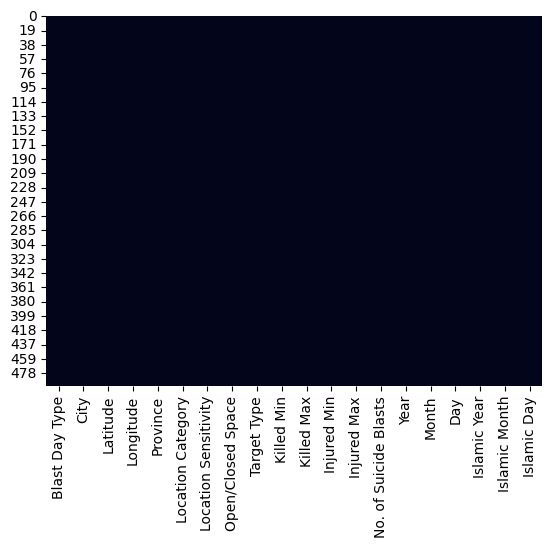

In [126]:
# Tabloda da göreceğimiz üzere veri setinde null değer kalmamıştır
sns.heatmap(df.isnull(), cbar=False)

21. Sütunların veri tiplerini gözden geçirelim

In [127]:
df.head()

,Blast Day Type,City,Latitude,Longitude,Province,Location Category,Location Sensitivity,Open/Closed Space,Target Type,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Year,Month,Day,Islamic Year,Islamic Month,Islamic Day
0,Holiday,islamabad,33.7180,73.0718,capital,Foreign,High,Closed,Foreigner,14.000000,15.0,31.39726,60.0,2.0,1995,11,19,1416,6,26
1,Working Day,karachi,24.9918,66.9911,sindh,Office Building,Low,Closed,Media,14.725714,3.0,31.39726,3.0,1.0,2000,11,6,1421,8,10
2,Working Day,karachi,24.9918,66.9911,sindh,Hotel,Medium,Closed,Foreigner,13.000000,15.0,20.00000,40.0,1.0,2002,5,8,1423,2,25
3,Working Day,karachi,24.9918,66.9911,sindh,Foreign,High,Closed,Foreigner,14.725714,12.0,31.39726,51.0,1.0,2002,6,14,1423,4,3
4,Working Day,quetta,30.2095,67.0182,balochistan,Religious,Medium,Closed,Religious,44.000000,47.0,31.39726,65.0,1.0,2003,7,4,1424,5,4


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 495
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Blast Day Type         492 non-null    object 
 1   City                   492 non-null    object 
 2   Latitude               492 non-null    float64
 3   Longitude              492 non-null    object 
 4   Province               492 non-null    object 
 5   Location Category      492 non-null    object 
 6   Location Sensitivity   492 non-null    object 
 7   Open/Closed Space      492 non-null    object 
 8   Target Type            492 non-null    object 
 9   Killed Min             492 non-null    float64
 10  Killed Max             492 non-null    float64
 11  Injured Min            492 non-null    float64
 12  Injured Max            492 non-null    float64
 13  No. of Suicide Blasts  492 non-null    float64
 14  Year                   492 non-null    int32  
 15  Month      

In [129]:
# Veri tiplerini sayısal veriye ya da kategorik veri tipine çevirelim
df["Blast Day Type"] = df["Blast Day Type"].astype('category')
df["City"] = df["City"].astype('category')
df["Longitude"] = df["Longitude"].astype(float)
df["Province"] = df["Province"].astype('category')
df["Location Category"] = df["Location Category"].astype('category')
df["Location Sensitivity"] = df["Location Sensitivity"].astype('category')
df["Open/Closed Space"] = df["Open/Closed Space"].astype('category')
df["Target Type"] = df["Target Type"].astype('category')
df["Islamic Year"] = df["Islamic Year"].astype(int)
df["Islamic Month"] = df["Islamic Month"].astype(int)
df["Islamic Day"] = df["Islamic Day"].astype(int)

# Değişiklik sonrası
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 495
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Blast Day Type         492 non-null    category
 1   City                   492 non-null    category
 2   Latitude               492 non-null    float64 
 3   Longitude              492 non-null    float64 
 4   Province               492 non-null    category
 5   Location Category      492 non-null    category
 6   Location Sensitivity   492 non-null    category
 7   Open/Closed Space      492 non-null    category
 8   Target Type            492 non-null    category
 9   Killed Min             492 non-null    float64 
 10  Killed Max             492 non-null    float64 
 11  Injured Min            492 non-null    float64 
 12  Injured Max            492 non-null    float64 
 13  No. of Suicide Blasts  492 non-null    float64 
 14  Year                   492 non-null    int32   

In [130]:
# Kategorik değerleri de sayısal değere çevirelim
# Bunun için Label Encode kullanılmıştır. (Bunun yerine One Hot Coding de kullanılabilir)
# Sütunların sayısal verilerini yeni sütunlara atıyoruz
label_encoder = LabelEncoder()
df["Blast Day Type Num"] = label_encoder.fit_transform(df["Blast Day Type"])
df["City Num"] = label_encoder.fit_transform(df["City"])
df["Province Num"] = label_encoder.fit_transform(df["Province"])
df["Location Category Num"] = label_encoder.fit_transform(df["Location Category"])
df["Location Sensitivity Num"] = label_encoder.fit_transform(df["Location Sensitivity"])
df["Open/Closed Space Num"] = label_encoder.fit_transform(df["Open/Closed Space"])
df["Target Type Num"] = label_encoder.fit_transform(df["Target Type"])

# Artık eski sütunları silebilriz
df = df.drop(columns={'City', 'Province', 'Blast Day Type', 'Location Category', 'Location Sensitivity', 'Open/Closed Space', 'Target Type'})

22. Verilerimizin son hali

<Axes: >

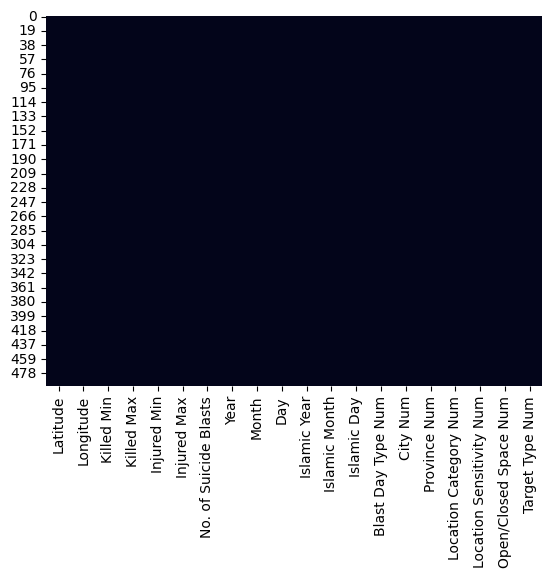

In [131]:
sns.heatmap(df.isnull(), cbar=False)

In [132]:
df

,Latitude,Longitude,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Year,Month,Day,Islamic Year,Islamic Month,Islamic Day,Blast Day Type Num,City Num,Province Num,Location Category Num,Location Sensitivity Num,Open/Closed Space Num,Target Type Num
0,33.718000,73.071800,14.000000,15.0,31.39726,60.00000,2.0,1995,11,19,1416,6,26,0,17,2,4,0,0,2
1,24.991800,66.991100,14.725714,3.0,31.39726,3.00000,1.0,2000,11,6,1421,8,10,2,19,6,11,1,0,4
2,24.991800,66.991100,13.000000,15.0,20.00000,40.00000,1.0,2002,5,8,1423,2,25,2,19,6,7,2,0,2
3,24.991800,66.991100,14.725714,12.0,31.39726,51.00000,1.0,2002,6,14,1423,4,3,2,19,6,4,0,0,2
4,30.209500,67.018200,44.000000,47.0,31.39726,65.00000,1.0,2003,7,4,1424,5,4,2,43,1,14,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,30.203658,67.004469,15.000000,15.0,40.00000,40.00000,1.0,2017,8,12,1438,11,20,1,43,1,17,2,1,5
491,28.571051,67.496895,21.000000,22.0,25.00000,39.45987,1.0,2017,10,5,1439,1,15,2,43,1,14,0,1,1
493,30.221057,67.002524,2.000000,2.0,8.00000,8.00000,1.0,2017,11,9,1439,2,20,2,43,1,13,1,1,6
494,33.970623,71.438620,1.000000,3.0,6.00000,8.00000,1.0,2017,11,24,1439,3,6,2,40,4,13,1,1,6


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 0 to 495
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Latitude                  492 non-null    float64
 1   Longitude                 492 non-null    float64
 2   Killed Min                492 non-null    float64
 3   Killed Max                492 non-null    float64
 4   Injured Min               492 non-null    float64
 5   Injured Max               492 non-null    float64
 6   No. of Suicide Blasts     492 non-null    float64
 7   Year                      492 non-null    int32  
 8   Month                     492 non-null    int32  
 9   Day                       492 non-null    int32  
 10  Islamic Year              492 non-null    int64  
 11  Islamic Month             492 non-null    int64  
 12  Islamic Day               492 non-null    int64  
 13  Blast Day Type Num        492 non-null    int64  
 14  City Num       

23. Temizlenmiş veriyi yeni dosya olarak kaydetme

In [134]:
df.to_csv('Dataset/CleanData.csv')

In [135]:
[
    'Latitude', 'Longitude', 'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

['Latitude',
 'Longitude',
 'Killed Min',
 'Killed Max',
 'Injured Min',
 'Injured Max',
 'No. of Suicide Blasts',
 'Year',
 'Month',
 'Day',
 'Islamic Year',
 'Islamic Month',
 'Islamic Day',
 'Blast Day Type Num',
 'City Num',
 'Province Num',
 'Location Category Num',
 'Location Sensitivity Num',
 'Open/Closed Space Num',
 'Target Type Num']

In [136]:
# Modeller
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

# İlgili hesaplamalar
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix

Killed Min
Mean Squared Error: 100.72299062022675
R-Squared: 0.6774173051154627
Mean Absolute Error: 4.929213852813854


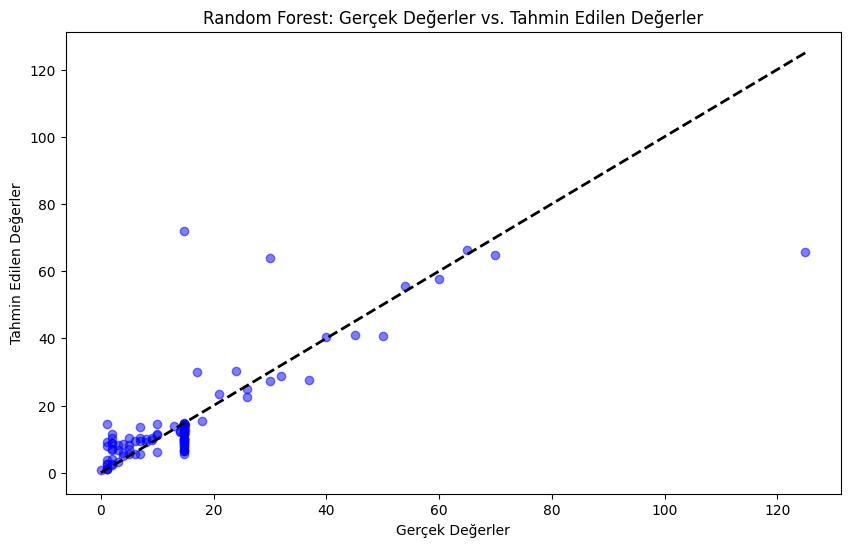

In [137]:
print("Killed Min")

column_names = [
    'Latitude', 'Longitude', 'Killed Max', 'Injured Min', 'Injured Max',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

X = df[column_names]
y = df['Killed Min']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modelini oluştur ve eğit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Modeli test et ve tahminleri yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Mean Absolute Error:", mae)

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

Killed Max
Mean Squared Error: 259.29091609229005
R-Squared: 0.6153717981305342
Mean Absolute Error: 6.308950126262626


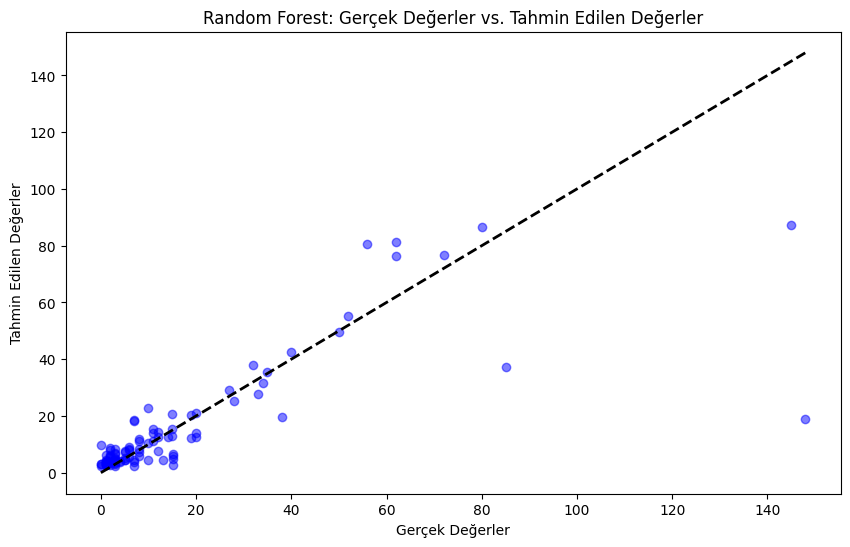

In [138]:
print("Killed Max")

column_names = [
    'Latitude', 'Longitude', 'Killed Min', 'Injured Min', 'Injured Max',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

X = df[column_names]
y = df['Killed Max']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modelini oluştur ve eğit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Modeli test et ve tahminleri yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Mean Absolute Error:", mae)

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

Injured Min
Mean Squared Error: 373.69845891813617
R-Squared: 0.5306220331600842
Mean Absolute Error: 11.413426041234258


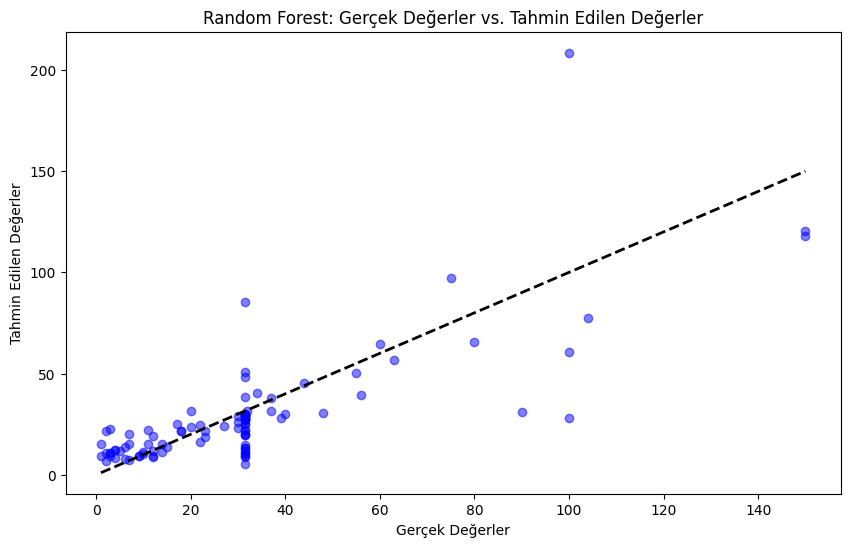

In [139]:
print("Injured Min")

column_names = [
    'Latitude', 'Longitude', 'Killed Min', 'Killed Max', 'Injured Max',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

X = df[column_names]
y = df['Injured Min']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modelini oluştur ve eğit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Modeli test et ve tahminleri yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Mean Absolute Error:", mae)

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

Injured Max
Mean Squared Error: 1961.8610180735698
R-Squared: 0.5117432812827984
Mean Absolute Error: 17.302483621464102


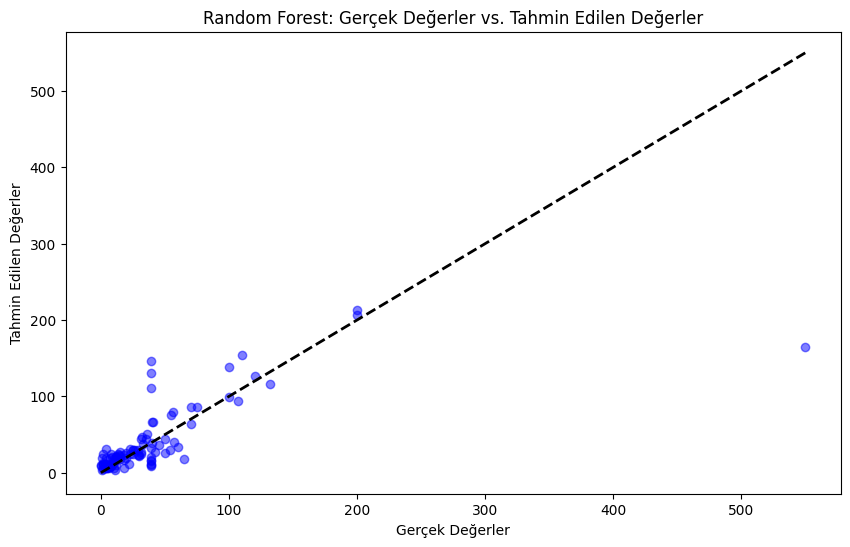

In [140]:
print("Injured Max")

column_names = [
    'Latitude', 'Longitude', 'Killed Min', 'Killed Max', 'Injured Min',
    'No. of Suicide Blasts', 'Year', 'Month', 'Day', 'Islamic Year', 'Islamic Month',
    'Islamic Day', 'Blast Day Type Num', 'City Num', 'Province Num', 'Location Category Num',
    'Location Sensitivity Num', 'Open/Closed Space Num', 'Target Type Num'
]

X = df[column_names]
y = df['Injured Max']

# Veri setini eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rastgele Orman Regresyon modelini oluştur ve eğit
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Modeli test et ve tahminleri yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared:", r2)
print("Mean Absolute Error:", mae)

# Gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir scatter plot çiz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()